# Car Price Prediction

In [202]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [169]:
car_df = pd.read_csv("E:\\Jyoti new data\\Oasis Infobyte Internship\\New folder\\car data.csv")

In [170]:
car_df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [171]:
car_df.shape

(301, 9)

In [172]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [173]:
car_df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Visualizing data

In [174]:
carNames = car_df['Car_Name'].value_counts()
carNames[:20]

Car_Name
city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
Name: count, dtype: int64

In [175]:
label = ["city","corolla altis","verna","fortuner","brio","ciaz","innova","i20","grand i10","jazz","amaze","Royal Enfield Classic 350","ertiga","eon","sx4","alto k10","i10","swift","Bajaj Pulsar 150 ","Royal Enfield Thunder 350"]

([<matplotlib.patches.Wedge at 0x2471377fb10>,
 [Text(0.981007239630953, 0.4976191272365423, 'city'),
  Text(0.3699944440503063, 1.035907385518563, 'corolla altis'),
  Text(-0.21703366420026307, 1.0783767377887041, 'verna'),
  Text(-0.6656916345927322, 0.8757023738881017, 'fortuner'),
  Text(-0.9425428949286715, 0.5671092409928439, 'brio'),
  Text(-1.0783767352486844, 0.2170336768208782, 'ciaz'),
  Text(-1.0912263165332614, -0.1386547009850389, 'innova'),
  Text(-0.9898314161211474, -0.4798268100675535, 'i20'),
  Text(-0.7985950166927618, -0.7564694305214769, 'grand i10'),
  Text(-0.5671092079001306, -0.9425429148398956, 'jazz'),
  Text(-0.31336884007720833, -1.054419257254279, 'amaze'),
  Text(-0.03971259007862032, -1.0992829072578394, 'Royal Enfield Classic 350'),
  Text(0.21703375254456453, -1.078376720008562, 'ertiga'),
  Text(0.4437787414190977, -1.0065090305926132, 'eon'),
  Text(0.6497731297235191, -0.8875780979098701, 'sx4'),
  Text(0.8121223355584548, -0.7419281043922522, 'alt

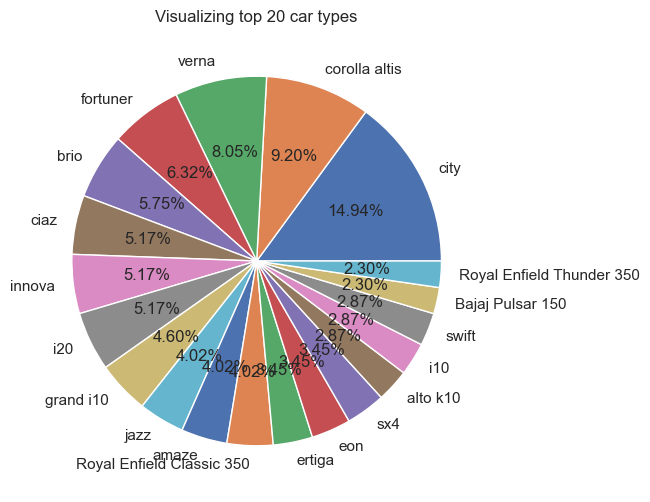

In [176]:
plt.figure(figsize = (8,6))
plt.title("Visualizing top 20 car types")
plt.pie(carNames[0:20], labels = label , autopct = "%1.2f%%")

In [177]:
year_counts = car_df['Year'].value_counts()
year_counts

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

Text(0.5, 1.0, 'Year in more cars sold')

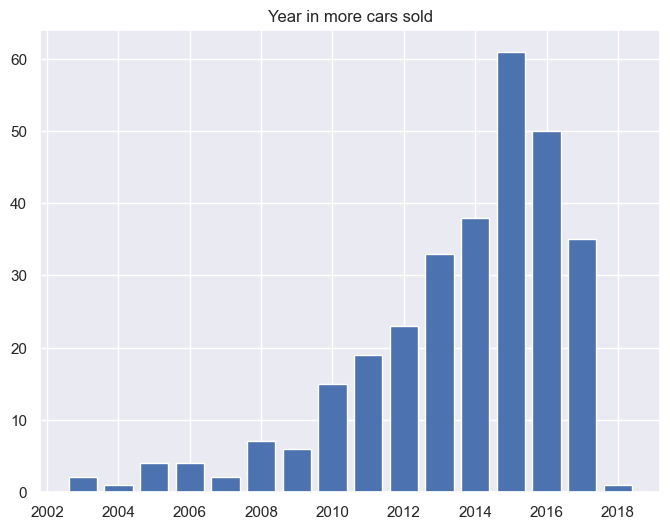

In [178]:
plt.figure(figsize = (8,6))
plt.bar(year_counts.index, year_counts)
plt.title("Year in more cars sold")

In [179]:
fuel_count = car_df['Fuel_Type'].value_counts()

Text(0.5, 1.0, 'Most used Fuel')

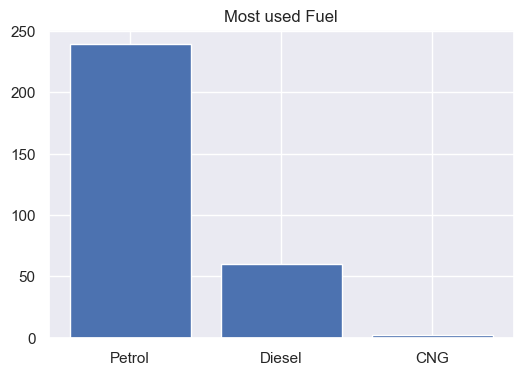

In [180]:
plt.figure(figsize = (6,4))
plt.bar(fuel_count.index, fuel_count)
plt.title("Most used Fuel")

In [181]:
carSellingPrice=car_df[['Car_Name','Selling_Price']].groupby(['Car_Name','Selling_Price']).sum().reset_index().sort_values(by='Selling_Price',ascending=False)
carSellingPrice

,Car_Name,Selling_Price
245,land cruiser,35.00
207,fortuner,33.00
206,fortuner,23.50
237,innova,23.00
205,fortuner,23.00
...,...,...
1,Activa 3g,0.17
53,Honda CB twister,0.16
14,Bajaj Discover 125,0.15
49,Honda CB Shine,0.12


Text(0, 0.5, 'Present price')

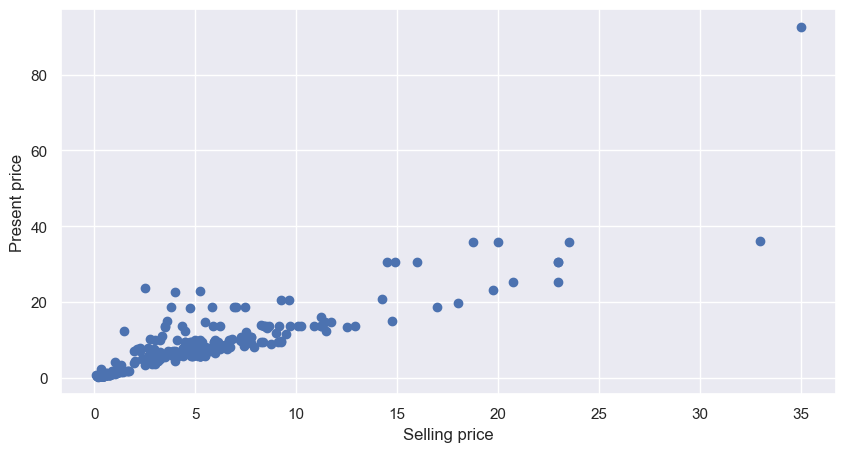

In [186]:
plt.scatter(car_df.Selling_Price,car_df.Present_Price)
plt.xlabel("Selling price")
plt.ylabel("Present price")

## Converting categorical data to numerical data

In [183]:
lencoder = LabelEncoder()

In [121]:
car_df['Car_Name'] = lencoder.fit_transform(car_df['Car_Name'])
car_df['Fuel_Type'] = lencoder.fit_transform(car_df['Fuel_Type'])
car_df['Selling_type'] = lencoder.fit_transform(car_df['Selling_type'])
car_df['Transmission'] = lencoder.fit_transform(car_df['Transmission'])

In [122]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [123]:
#car_df.drop(['Fuel_type'],axis = 1)

In [124]:
corr_mat = car_df.corr()
corr_mat

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Car_Name,1.000000,0.017265,0.499198,0.475336,0.064453,-0.371446,-0.829718,-0.059855,-0.081192
Year,0.017265,1.000000,0.236141,-0.047192,-0.524342,-0.053643,-0.039896,0.000394,-0.182104
Selling_Price,0.499198,0.236141,1.000000,0.878914,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,0.475336,-0.047192,0.878914,1.000000,0.203618,-0.440493,-0.512121,-0.348776,0.008058
Driven_kms,0.064453,-0.524342,0.029187,0.203618,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,-0.371446,-0.053643,-0.509467,-0.440493,-0.166801,1.000000,0.352415,0.080466,0.055705
Selling_type,-0.829718,-0.039896,-0.550724,-0.512121,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,-0.059855,0.000394,-0.367128,-0.348776,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,-0.081192,-0.182104,-0.088344,0.008058,0.089216,0.055705,0.124269,-0.050316,1.000000


<Figure size 800x600 with 0 Axes>

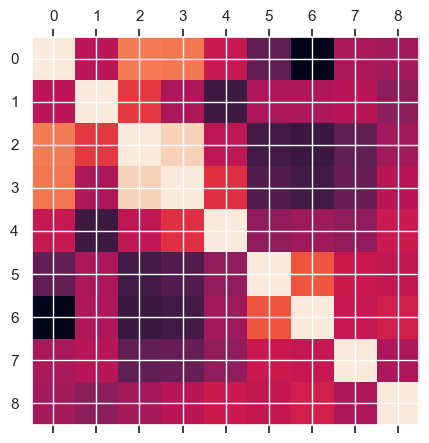

In [127]:
plt.figure(figsize = (8,6))
plt.matshow(corr_mat)

<Axes: >

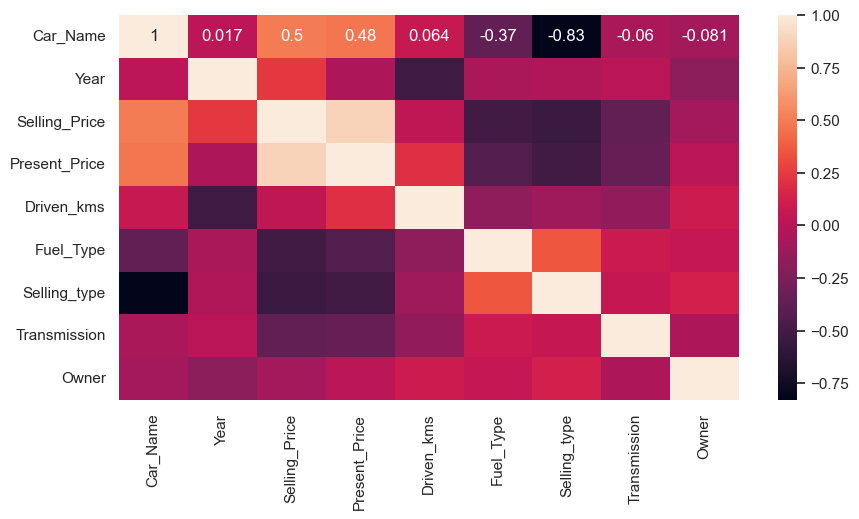

In [128]:
sns.set(rc = {'figure.figsize' : (10,5)})
sns.heatmap(corr_mat, annot = True)

In [136]:
x = car_df.drop(['Selling_Price'], axis = 1)
y = car_df['Selling_Price']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

## Model building

## Linear Regression

In [137]:
linear_model = LinearRegression()

In [138]:
linear_model.fit(xtrain, ytrain)

LinearRegression()

In [159]:
prediction_train = linear_model.predict(xtrain)
prediction_test = linear_model.predict(xtest)
print("Prediction for training data: ", prediction_train[0:5])
print("Prediction for testing data: ", prediction_test[0:5])

Prediction for training data:  [-0.60684862  0.30240047  1.43306054  8.1161927  -4.14826732]
Prediction for testing data:  [2.02324296 4.97286208 2.68660978 0.2958491  0.32222579]


In [162]:
print("Model accuracy for training data: ", mean_squared_error(ytrain, prediction_train))
print("Model accuracy for testing data: ",mean_squared_error(ytest,prediction_test))

Model accuracy for training data:  3.3467297929748985
Model accuracy for testing data:  3.2112895274002273


## DecisionTreeRegressor

In [198]:
decision_model = DecisionTreeRegressor(random_state = 2)

In [199]:
decision_model.fit(xtrain, ytrain)

DecisionTreeRegressor(random_state=2)

In [206]:
prediction_train = decision_model.predict(xtrain)
prediction_test = decision_model.predict(xtest)
prediction_train

array([ 0.45,  0.27,  1.15,  8.35,  0.35,  0.16,  8.99,  4.  ,  9.15,
        1.95,  1.2 ,  5.75,  5.25,  2.65,  0.15,  5.9 ,  0.4 ,  3.35,
        0.2 ,  5.4 ,  0.48,  3.35,  0.3 ,  5.8 ,  5.4 , 11.45,  0.6 ,
        4.15,  8.4 ,  6.  , 11.25,  4.  ,  1.95,  7.5 ,  8.25,  3.75,
        7.2 ,  4.4 ,  1.15,  7.05,  7.75,  0.1 ,  0.45,  3.1 ,  4.5 ,
        3.95, 14.5 ,  5.95,  5.25,  1.2 ,  5.5 ,  0.45,  2.25,  4.75,
        6.85,  0.4 ,  0.75,  0.48,  3.49,  0.8 ,  2.1 ,  5.35,  9.25,
        2.9 ,  4.5 ,  3.1 ,  4.6 ,  4.85,  0.6 ,  0.3 ,  3.6 ,  0.31,
        1.05,  4.95,  3.  , 14.73,  0.65,  0.6 ,  3.  , 18.75,  3.  ,
        2.9 , 10.11, 23.5 ,  4.75,  4.9 , 11.5 ,  1.05,  0.9 ,  4.75,
        0.6 ,  7.75,  9.5 , 14.25,  9.1 ,  3.8 , 35.  ,  0.35,  2.85,
        0.75, 10.25,  4.5 ,  2.75,  4.1 ,  1.15,  6.95, 19.75,  5.5 ,
        0.72,  9.65, 23.  ,  1.05,  4.35,  0.35,  0.6 ,  8.65,  0.55,
        7.45,  2.  ,  1.  ,  1.45,  2.25,  1.1 ,  3.  ,  3.1 ,  2.25,
        0.5 ,  1.1 ,

In [209]:
print("Model root mean squared error for testing data: ",np.sqrt(mean_squared_error(ytest,prediction_test)))

Model root mean squared error for testing data:  0.8838110533490617


## RandomForestRegressor

In [210]:
random_model = RandomForestRegressor()

In [211]:
random_model.fit(xtrain, ytrain)

RandomForestRegressor()

In [212]:
prediction_train = random_model.predict(xtrain)
prediction_test = random_model.predict(xtest)
prediction_train

array([ 0.4599,  0.272 ,  1.1345,  7.8849,  0.5455,  0.1839,  9.2715,
        4.957 ,  9.3491,  2.1875,  1.166 ,  5.3455,  6.4235,  2.669 ,
        0.175 ,  5.7795,  0.4141,  3.84  ,  0.2367,  5.3195,  0.4774,
        3.2944,  0.2667,  5.522 ,  5.2255, 11.7235,  0.5765,  4.0305,
        8.6435,  5.645 , 10.1776,  4.237 ,  2.2145,  7.4778,  7.678 ,
        3.576 ,  6.5685,  4.167 ,  1.1515,  6.9635,  7.82  ,  0.1602,
        0.4425,  3.232 ,  4.751 ,  4.3765, 15.7585,  6.6195,  5.2175,
        1.185 ,  5.8015,  0.4758,  2.601 ,  5.181 ,  7.017 ,  0.3928,
        0.7797,  0.5835,  3.686 ,  0.7885,  2.304 ,  5.1795,  8.8084,
        2.8825,  4.8509,  3.2775,  4.64  ,  4.9815,  0.6586,  0.2772,
        3.7062,  0.3645,  0.9795,  5.1815,  2.945 , 13.5243,  0.5714,
        0.5749,  2.821 , 20.2195,  3.0615,  2.752 , 10.1815, 23.575 ,
        4.821 ,  5.601 , 10.5569,  1.0995,  0.9455,  4.57  ,  0.5653,
        7.82  ,  9.0856, 14.3666,  8.2721,  4.2183, 30.918 ,  0.3826,
        2.723 ,  0.7

In [213]:
print("Model root mean squared error for testing data: ",np.sqrt(mean_squared_error(ytest,prediction_test)))

Model root mean squared error for testing data:  0.8184485766603552


In [214]:
print("Model accuracy for training data: ", mean_squared_error(ytrain, prediction_train))
print("Model accuracy for testing data: ",mean_squared_error(ytest,prediction_test))

Model accuracy for training data:  0.36707112804761877
Model accuracy for testing data:  0.6698580726373613
